In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import pandas as pd
from keras.optimizers import RMSprop
from data_loading import BRATS_DataGenerator
from losses import *
from keras.models import load_model
from fast_mri_view import *

In [8]:
#first, let's load the data:

#brats = pd.read_csv('./survival_data.csv')
brats = pd.read_csv('/mnt/dsets/brats/survival_data.csv')
all_subjects = brats.BraTS18ID

# the model hasn't seen this part of the data before, so we're using it for evaluation:
evaluation_subjects = all_subjects[130:]
# now, we're gonna load the data:
gen_eval = BRATS_DataGenerator(list(evaluation_subjects), n_labels=4, augment_flip=False)
# let's laod the trained model from the directory:
loaded_model = load_model('/home/Shahryar.Khorasani/models/brats/vnet/2020_07_23_081002/vnet_brats_2_fold.h5', compile=False)

loaded_model.compile(optimizer=RMSprop(lr=0), loss=generalised_dice_loss_3D, metrics=['accuracy', brats_wt_metric, brats_tc_metric, brats_et_metric])

In [9]:
# let's look at the model
print(loaded_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 192, 192, 192 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 192, 192, 192 1962        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 192, 192, 192 0           conv3d_1[0][0]                   
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 96, 96, 96, 6 9280        leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [10]:
evaluations = loaded_model.evaluate_generator(gen_eval, workers=8, use_multiprocessing=True, verbose=1)

In [14]:
#  order of the evaluation output:  total dice loss, total accuracy, whole tumor, tumor core, enhancing tumor
print(evaluations)

[0.40776984077511413, 0.9932160214944319, 0.6781212958422574, 0.7872525525815559, 0.7059765462622498]


In [16]:
predictions = loaded_model.predict_generator(gen_eval, workers=8, use_multiprocessing=True, verbose=1)

33/33 [==============================] - 46s 1s/step


In [99]:
# we're using subject number 19 as an example to look at ground truth vs model predictions.
# we're also gonna look at different modalities to make things more interesting :)
n=19

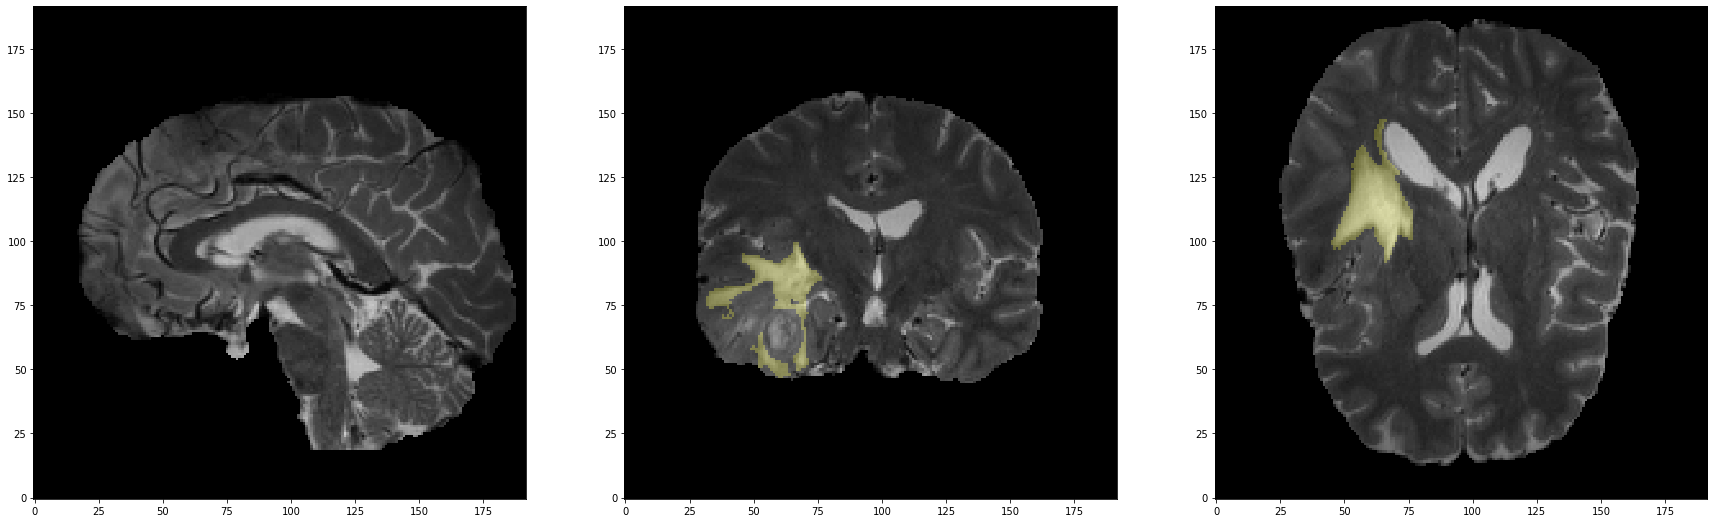

In [99]:
# ground truth on T2
scan = gen_eval[n][0][0][:,:,:,2]
label = gen_eval[n][1][0][:,:,:,2]
show_mask(scan, label)

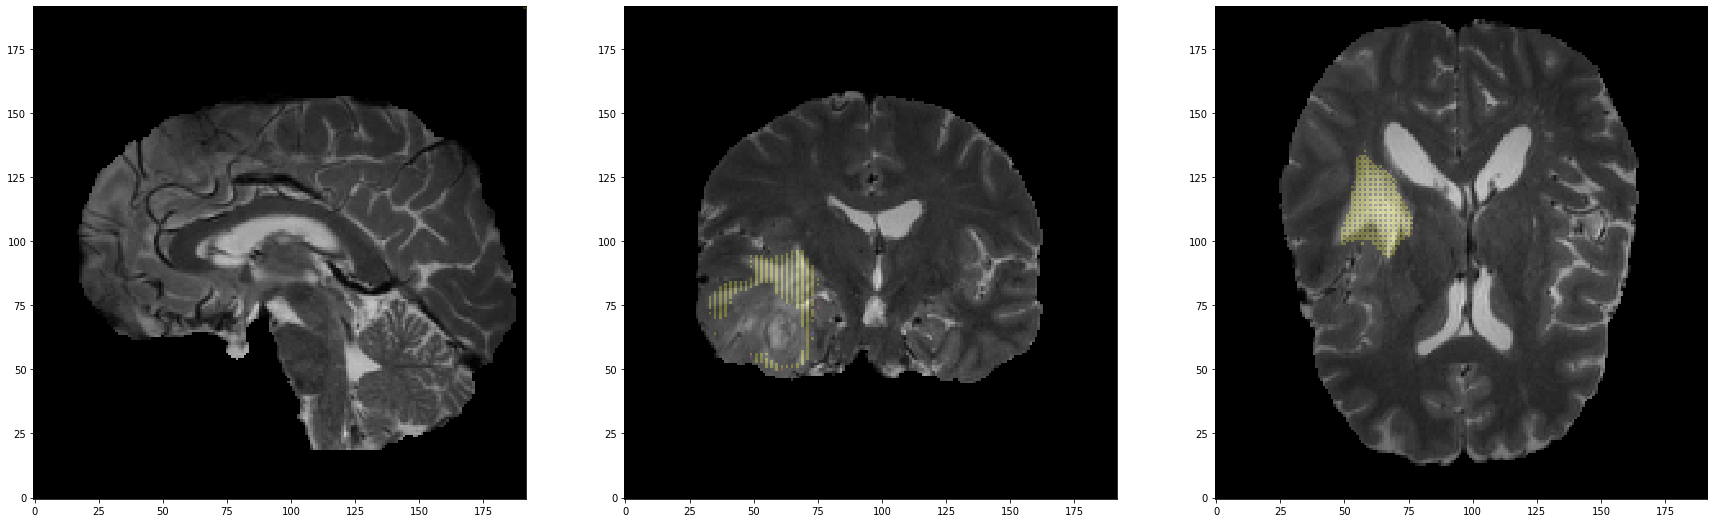

In [87]:
# model prediction on T2
scan = gen_eval[n][0][0][:,:,:,2]
pred = predictions[n][:,:,:, 2]
show_mask(scan, pred)

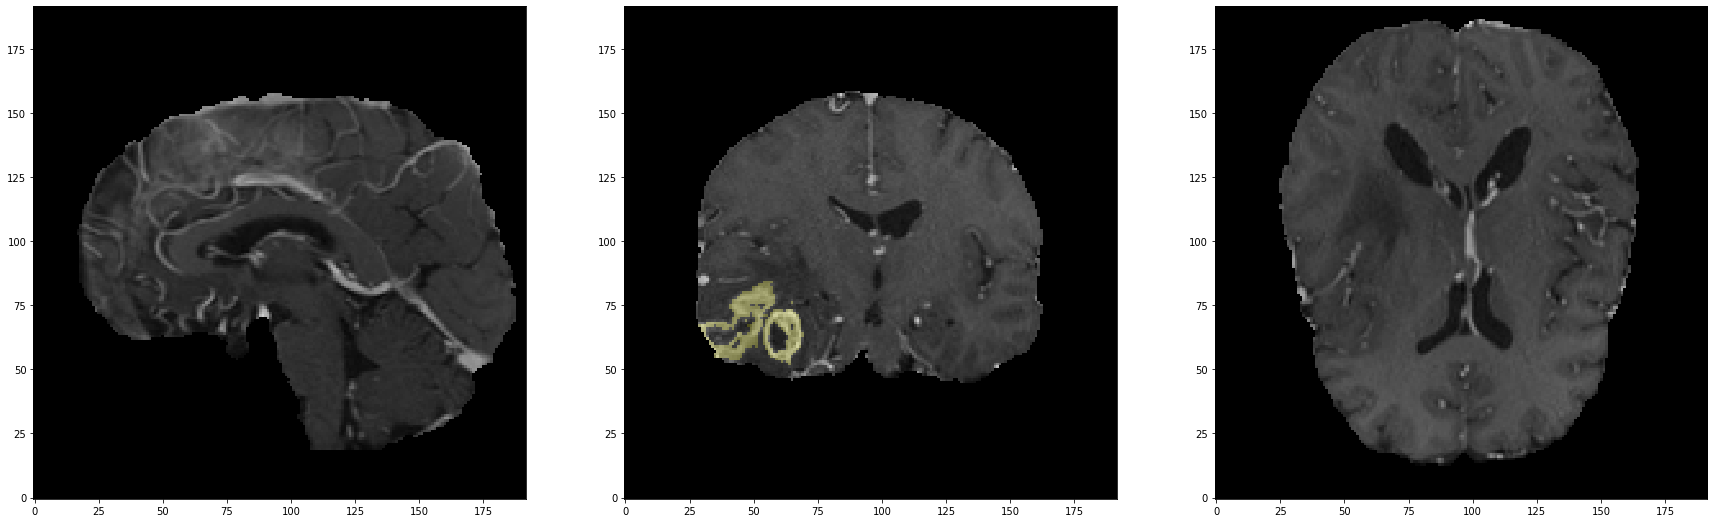

In [91]:
# ground truth on T1ce
scan = gen_eval[n][0][0][:,:,:,1]
label = gen_eval[n][1][0][:,:,:,3]
show_mask(scan, label)

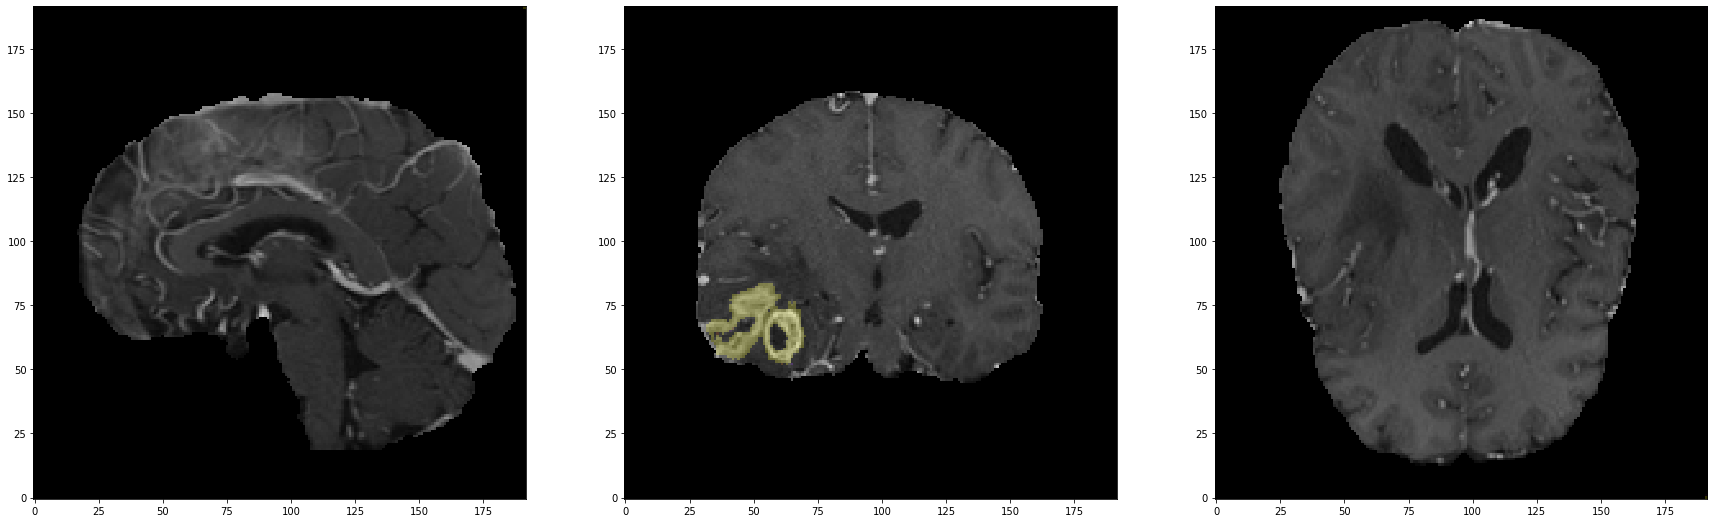

In [92]:
# model prediction on T!ce
scan = gen_eval[n][0][0][:,:,:,1]
pred = predictions[n][:,:,:, 3]
show_mask(scan, pred)

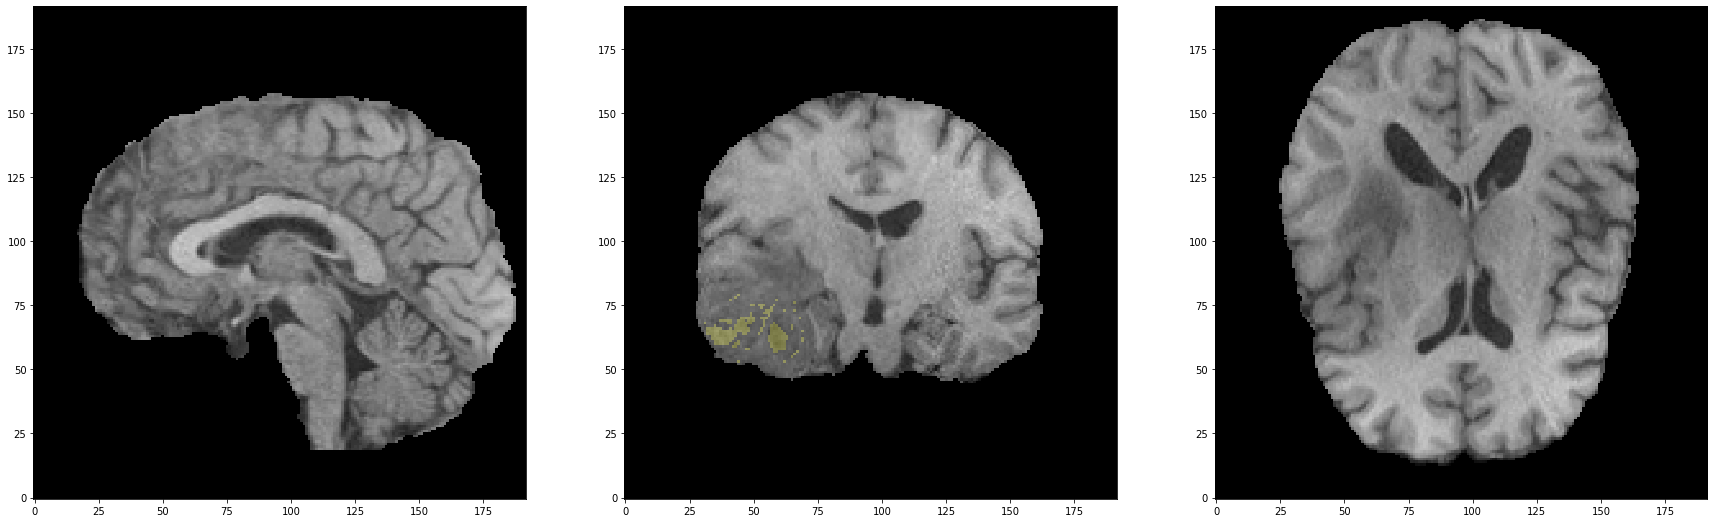

In [93]:
# ground truth on T1
scan = gen_eval[n][0][0][:,:,:,0]
label = gen_eval[n][1][0][:,:,:,1]
show_mask(scan, label)

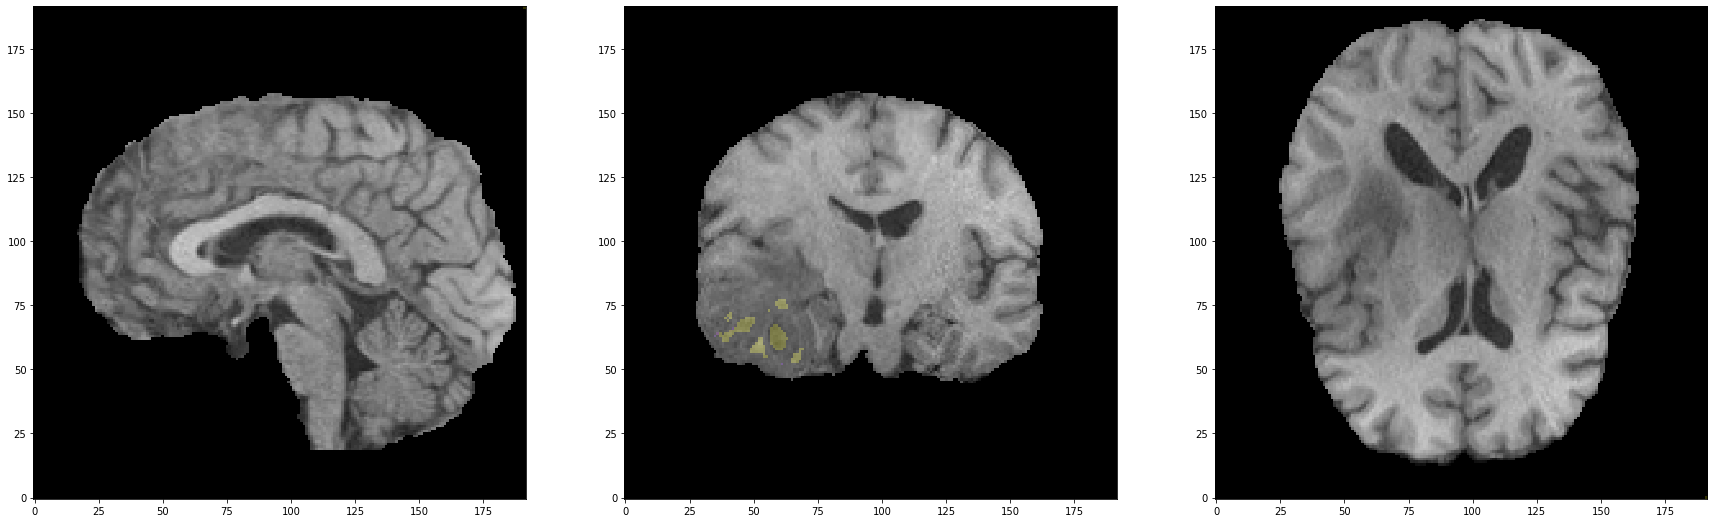

In [96]:
# model prediction on T1
scan = gen_eval[n][0][0][:,:,:,0]
pred = predictions[n][:,:,:, 1]
show_mask(scan, pred)